In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import datetime
import time
df=pd.read_csv("C:/Users/jinwe/Desktop/Insight/dc_1/employee_retention_data.csv")
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [2]:
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [3]:
df.isnull().sum()


employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [4]:
df[['join_date','quit_date']]=df[['join_date','quit_date']].apply(pd.to_datetime)
df[['company_id']]=df[['company_id']].astype(str)
df.dtypes

employee_id           float64
company_id             object
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [5]:
df['quit_bool'] = df.quit_date.isnull()
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_bool
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,True
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False


In [6]:
a=df['quit_date']-df['join_date']
print(a)

0        585 days
1        340 days
2             NaT
3        389 days
4       1040 days
5        578 days
6             NaT
7             NaT
8       1047 days
9             NaT
10       837 days
11            NaT
12       340 days
13      1194 days
14       340 days
15       409 days
16       723 days
17            NaT
18            NaT
19            NaT
20            NaT
21       340 days
22      1316 days
23       360 days
24       368 days
25       619 days
26            NaT
27       347 days
28       795 days
29      1152 days
           ...   
24672    280 days
24673    828 days
24674    417 days
24675    340 days
24676    310 days
24677    396 days
24678    333 days
24679         NaT
24680         NaT
24681         NaT
24682         NaT
24683         NaT
24684    423 days
24685   1033 days
24686    371 days
24687    655 days
24688         NaT
24689    445 days
24690   1452 days
24691         NaT
24692    424 days
24693         NaT
24694         NaT
24695   1151 days
24696    3

In [7]:
df['day']=a
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_bool,day
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False,340 days
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,True,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False,1040 days


In [8]:
df['time_delta_int'] = df.day.astype('timedelta64[D]')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_bool,day,time_delta_int
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False,585 days,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False,340 days,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,True,NaT,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False,389 days,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False,1040 days,1040.0


In [9]:
join_m=df['join_date'].dt.month
quit_m=df['quit_date'].dt.month
df['join_m']=join_m
df['quit_m']=quit_m
df=df.drop(columns=['employee_id','join_date','quit_date'])
df.head()

,company_id,dept,seniority,salary,quit_bool,day,time_delta_int,join_m,quit_m
0,7,customer_service,28,89000.0,False,585 days,585.0,3,10.0
1,7,marketing,20,183000.0,False,340 days,340.0,4,4.0
2,4,marketing,14,101000.0,True,NaT,NaN,10,NaN
3,7,customer_service,20,115000.0,False,389 days,389.0,5,6.0
4,2,data_science,23,276000.0,False,1040 days,1040.0,10,8.0


In [10]:
#MASTER DATASET
df['quit'] = np.where(df['quit_m']>0, 'yes', 'no')
df.head()

,company_id,dept,seniority,salary,quit_bool,day,time_delta_int,join_m,quit_m,quit
0,7,customer_service,28,89000.0,False,585 days,585.0,3,10.0,yes
1,7,marketing,20,183000.0,False,340 days,340.0,4,4.0,yes
2,4,marketing,14,101000.0,True,NaT,NaN,10,NaN,no
3,7,customer_service,20,115000.0,False,389 days,389.0,5,6.0,yes
4,2,data_science,23,276000.0,False,1040 days,1040.0,10,8.0,yes


In [11]:
leaving=df.dropna()
leaving=leaving.drop(columns=['company_id','quit'])
leaving.head()

,dept,seniority,salary,quit_bool,day,time_delta_int,join_m,quit_m
0,customer_service,28,89000.0,False,585 days,585.0,3,10.0
1,marketing,20,183000.0,False,340 days,340.0,4,4.0
3,customer_service,20,115000.0,False,389 days,389.0,5,6.0
4,data_science,23,276000.0,False,1040 days,1040.0,10,8.0
5,data_science,14,165000.0,False,578 days,578.0,1,8.0


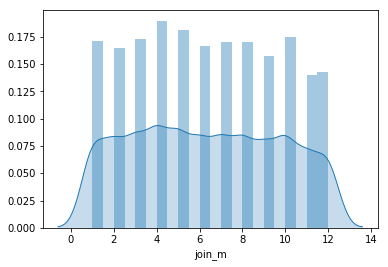

In [12]:
sns.distplot(leaving['join_m'], hist = True, kde = True,
             kde_kws = {'shade': True, 'linewidth': 1})

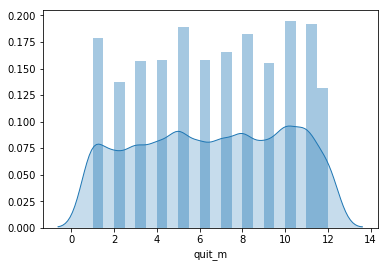

In [13]:
sns.distplot(leaving['quit_m'], hist = True, kde = True,
             kde_kws = {'shade': True, 'linewidth': 1})

In [14]:
leaving.dtypes

dept                       object
seniority                   int64
salary                    float64
quit_bool                    bool
day               timedelta64[ns]
time_delta_int            float64
join_m                      int64
quit_m                    float64
dtype: object

In [15]:
days=leaving['day'].dt.days 

In [16]:
leaving['days'] = days
leaving=leaving.drop(columns=['day'])
leaving.head()

,dept,seniority,salary,quit_bool,time_delta_int,join_m,quit_m,days
0,customer_service,28,89000.0,False,585.0,3,10.0,585
1,marketing,20,183000.0,False,340.0,4,4.0,340
3,customer_service,20,115000.0,False,389.0,5,6.0,389
4,data_science,23,276000.0,False,1040.0,10,8.0,1040
5,data_science,14,165000.0,False,578.0,1,8.0,578


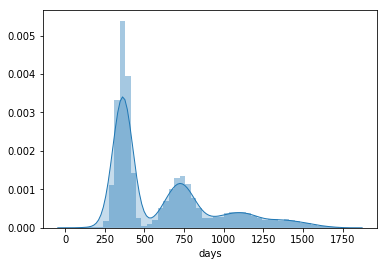

In [36]:
sns.distplot(leaving['days'], hist = True, kde = True,
             kde_kws = {'shade': True, 'linewidth': 1})

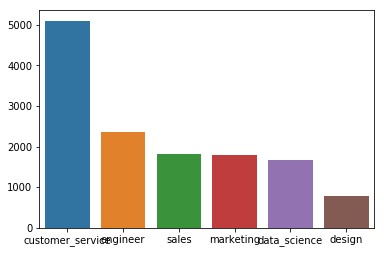

In [38]:
sns.barplot(x = leaving['dept'].value_counts().index,
            y = leaving['dept'].value_counts().values)

In [17]:
deptDummies = pd.get_dummies(df['dept'], prefix = 'dept')
joinDummies = pd.get_dummies(df['join_m'], prefix = 'joinm')
quitDummies = pd.get_dummies(df['quit_m'], prefix = 'quitm')
print(deptDummies)

       dept_customer_service  dept_data_science  dept_design  dept_engineer  \
0                          1                  0            0              0   
1                          0                  0            0              0   
2                          0                  0            0              0   
3                          1                  0            0              0   
4                          0                  1            0              0   
5                          0                  1            0              0   
6                          1                  0            0              0   
7                          1                  0            0              0   
8                          0                  0            0              1   
9                          0                  0            0              0   
10                         1                  0            0              0   
11                         0                  0     

In [18]:
print(joinDummies)

       joinm_1  joinm_2  joinm_3  joinm_4  joinm_5  joinm_6  joinm_7  joinm_8  \
0            0        0        1        0        0        0        0        0   
1            0        0        0        1        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        1        0        0        0   
4            0        0        0        0        0        0        0        0   
5            1        0        0        0        0        0        0        0   
6            0        0        0        0        0        0        0        0   
7            0        0        1        0        0        0        0        0   
8            0        0        0        0        0        0        0        0   
9            0        0        0        0        0        1        0        0   
10           0        0        0        0        0        0        0        0   
11           0        0     

In [19]:
print(quitDummies)

       quitm_1.0  quitm_2.0  quitm_3.0  quitm_4.0  quitm_5.0  quitm_6.0  \
0              0          0          0          0          0          0   
1              0          0          0          1          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          1   
4              0          0          0          0          0          0   
5              0          0          0          0          0          0   
6              0          0          0          0          0          0   
7              0          0          0          0          0          0   
8              0          0          0          0          0          0   
9              0          0          0          0          0          0   
10             0          1          0          0          0          0   
11             0          0          0          0          0          0   
12             0         

In [28]:
df = pd.concat([leaving, deptDummies,joinDummies,quitDummies], axis=1)
df=df.drop(columns=['dept','join_m','quit_m','time_delta_int'])
df=df.dropna()
df.head()

,seniority,salary,quit_bool,days,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales,...,quitm_3.0,quitm_4.0,quitm_5.0,quitm_6.0,quitm_7.0,quitm_8.0,quitm_9.0,quitm_10.0,quitm_11.0,quitm_12.0
0,28.0,89000.0,False,585.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20.0,183000.0,False,340.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,20.0,115000.0,False,389.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,23.0,276000.0,False,1040.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,14.0,165000.0,False,578.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
labels = np.array(df['days'])
features= df.drop('days', axis = 1)
name=list(features.columns.values)
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [30]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [31]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (10808, 33)
Training Labels Shape: (10808,)
Testing Features Shape: (2702, 33)
Testing Labels Shape: (2702,)


In [32]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [33]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'days.')

Mean Absolute Error: 262.41 days.


In [34]:
from sklearn.metrics import r2_score
predictions=predictions
r2_score(test_labels, predictions) 

0.06147730612804747

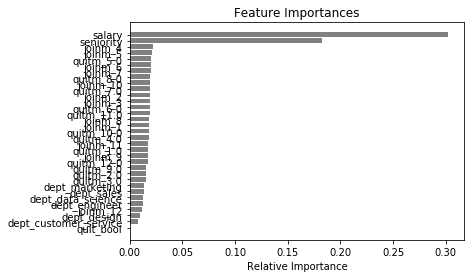

In [35]:
features = name
importances = rf.feature_importances_
indices = np.argsort(importances)

import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='gray', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Conclusion: Employees tend to leave work around 1 year and 2 years. There is no clear pattern in which month do employees quit job. It seems that the Random Forest model has little power to predict number of days at work based on the information provided. Not surprisingly, salary and senirority would be the two most important features. It might be helpful if employee satisfaction can be provided. If such data is not available, some survey can be desinged. 